# Filter-Experimente

Wir verwenden verschiedene 3×3- und 5×5-Kernel:
- Blur (Weichzeichnen)
- Horizontale und vertikale Kanten (Edge Detection)
- Sobel-Filter
- Emboss (Relief-Effekt)
- Diagonale Kanten

Am Ende könnt ihr euren **eigenen Filter** ausprobieren!

## Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

## 1. Faltungsfunktion

In [10]:
def simple_convolution(gray_image, kernel):
    kh, kw = kernel.shape
    ih, iw = gray_image.shape
    oh = ih - kh + 1
    ow = iw - kw + 1
    output = np.zeros((oh, ow), dtype=float)
    for i in range(oh):
        for j in range(ow):
            patch = gray_image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(patch * kernel)
    return output


## 3. Beispielbild laden
Wir verwenden die bekannte `camera`-Aufnahme als Graustufenbild.

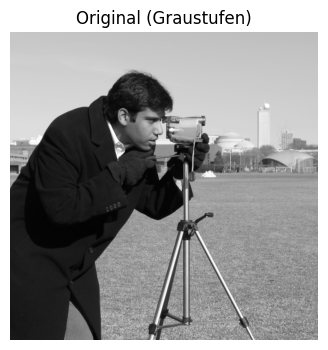

In [11]:
image_gray = data.camera().astype(float) / 255.0
plt.figure(figsize=(4, 4))
plt.imshow(image_gray, cmap='gray')
plt.title('Original (Graustufen)')
plt.axis('off')
plt.show()

## 4. Verschiedene Filter definieren

Hier sind einige **vorgefertigte Filter**, mit denen ihr spielen könnt.


In [12]:
# Blur (Weichzeichnen)
kernel_blur = np.ones((3, 3)) / 9.0

# Horizontale Kanten
kernel_edge_h = np.array([[-1, -1, -1],
                          [ 0,  0,  0],
                          [ 1,  1,  1]])

# Vertikale Kanten
kernel_edge_v = np.array([[-1,  0,  1],
                          [-1,  0,  1],
                          [-1,  0,  1]])

# Sobel (horizontal)
kernel_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Sobel (vertikal)
kernel_sobel_y = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]])

# Emboss (Relief-Effekt)
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

# Diagonale Kante (↘)
kernel_diag1 = np.array([[ 0, -1, -1],
                         [ 1,  0, -1],
                         [ 1,  1,  0]])

kernels = {
    'Blur (3x3)': kernel_blur,
    'Edge horizontal': kernel_edge_h,
    'Edge vertikal': kernel_edge_v,
    'Sobel X': kernel_sobel_x,
    'Sobel Y': kernel_sobel_y,
    'Emboss': kernel_emboss,
    'Diagonal ↘': kernel_diag1,
}
list(kernels.keys())

['Blur (3x3)',
 'Edge horizontal',
 'Edge vertikal',
 'Sobel X',
 'Sobel Y',
 'Emboss',
 'Diagonal ↘']

## 5. Alle Filter auf einmal ausprobieren

Wir wenden alle definierten Filter auf das Bild an und vergleichen die Ergebnisse nebeneinander.

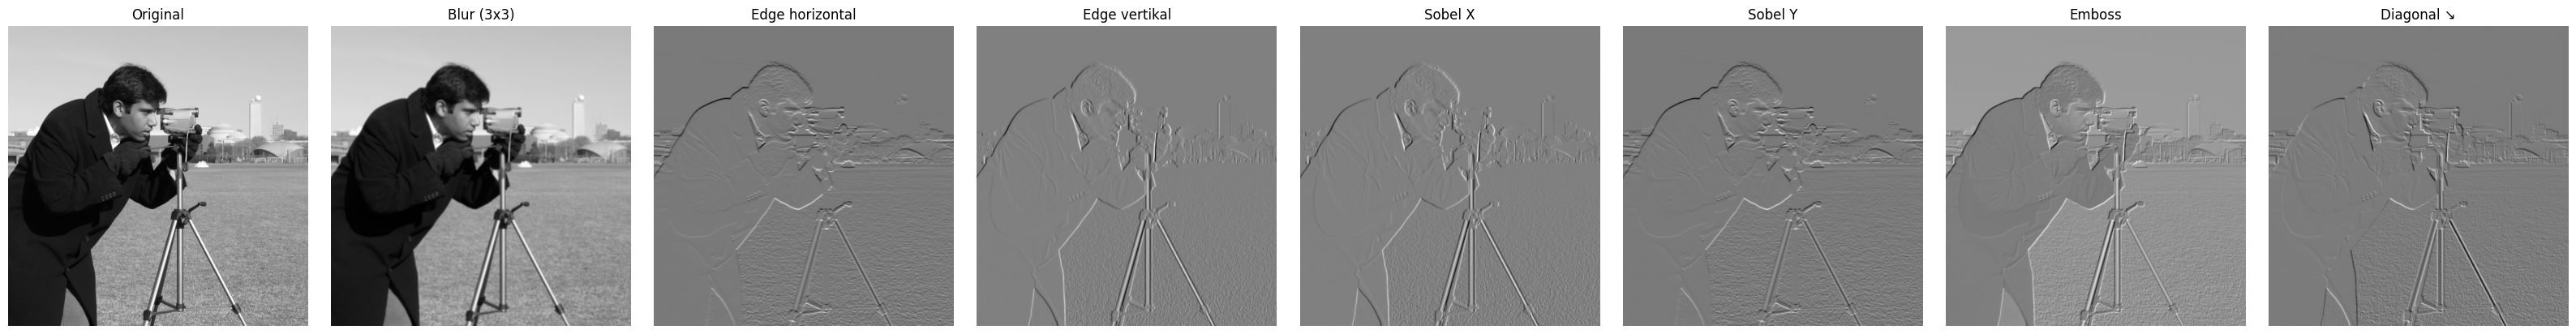

In [13]:
n = len(kernels)
plt.figure(figsize=(4*(n+1), 4))

# Original
plt.subplot(1, n+1, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

for idx, (name, kernel) in enumerate(kernels.items(), start=2):
    filtered = simple_convolution(image_gray, kernel)
    # Für die Darstellung normalisieren
    f_min, f_max = filtered.min(), filtered.max()
    filtered_show = (filtered - f_min) / (f_max - f_min + 1e-8)
    plt.subplot(1, n+1, idx)
    plt.imshow(filtered_show, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Was fällt euch auf?

## 6. Eigene Filter ausprobieren

Jetzt seid ihr dran! Definiert eigene 3×3-Filter und schaut, was passiert.

**Ideen:**
- Diagonale Kanten anders herum
- Stärkere Schärfung
- Noch weichere Unschärfe (größere Kernel)


Mein Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]


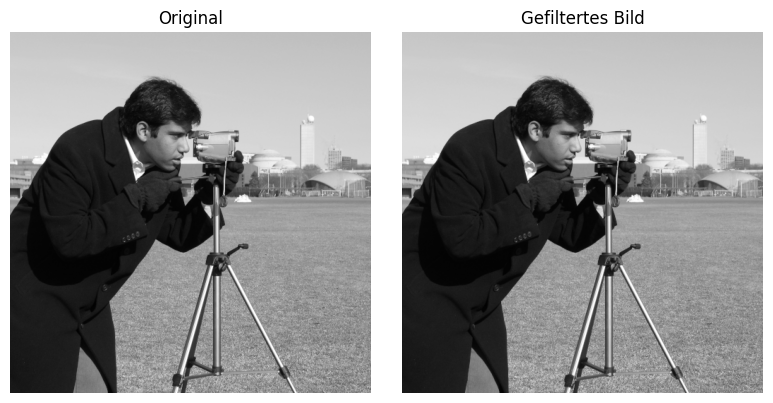

In [ ]:
# Beispiel: eigener 3x3-Filter
my_kernel = np.array([[0, 0, 0,],
                      [0, 1, 0],
                      [0, 0, 0]])
print('Mein Kernel:')
print(my_kernel)

filtered = simple_convolution(image_gray, my_kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered, cmap='gray', vmin=0, vmax=1)
plt.title('Gefiltertes Bild')
plt.axis('off')
plt.tight_layout()
plt.show()

### Aufgaben für euch

1. Erstellt einen **stärkeren Blur-Filter**, z.B. 5×5, und vergleicht ihn mit dem 3×3-Blur.
2. Baut einen eigenen **diagonalen Kantenfilter** (↙ statt ↘).
3. Überlegt: Was passiert, wenn die Summe aller Werte im Kernel sehr groß oder sehr klein ist?
